In [2]:
#Importation des librairies 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"] =(20,10)
import seaborn as sns
import os 
import glob 
import numpy as np
from sklearn.preprocessing import LabelEncoder
plt.style.use('fivethirtyeight')

In [3]:
os.chdir("C:/Users/Saloua DOUMI/OneDrive/Documents/Mes études/MASTER_SD1/S1/Gestion_projet/app_estimateur/apprentissage/transactions")

e = 'csv'
archives = [i for i in glob.glob('*.{}'.format(e))]

df = pd.concat([pd.read_csv(f, sep=";") for f in archives])
#Sauvergade des données regroupées sous format csv 
df.to_csv("../donnees_regroupees.csv", index=False, encoding="utf-8-sig")
#affichage des données 
df.head()


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,...,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,40,76800,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,NaN,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB


In [5]:
#taille du dataframe
df.shape

(2972, 41)

# Nettoyage  des données

In [6]:
#la suppresion des collonnes inutiles 
df_clean = df.drop(['date_mutation', 'numero_disposition', 'adresse_numero','adresse_suffixe','adresse_nom_voie', 'code_postal', 'code_commune', 
 'nom_commune', 'code_departement', 'ancien_code_commune', 'ancien_nom_commune','ancien_id_parcelle', 'numero_volume', 'lot1_numero', 'lot1_surface_carrez','lot2_numero',
  'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale', 'section_prefixe', 'id_parcelle', 'type_local', 'adresse_code_voie', 'nombre_lots', 'nature_mutation'], axis='columns')
df_clean.head()

,id_mutation,valeur_fonciere,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2022-360375,260000.0,1,129.0,4.0,351.0,1.071855,49.401886
1,2022-360375,260000.0,3,NaN,0.0,351.0,1.071855,49.401886
2,2021-1180016,160000.0,1,64.0,4.0,452.0,1.070963,49.402764
3,2021-1177880,174000.0,1,64.0,4.0,498.0,1.070475,49.403622
4,2021-1177880,174000.0,3,NaN,0.0,498.0,1.070475,49.403622


## vérifier si il existe des données nulles

In [7]:
df_clean.agg('count')

id_mutation                  2972
valeur_fonciere              2922
code_type_local              2972
surface_reelle_bati          1613
nombre_pieces_principales    2197
surface_terrain              2515
longitude                    2945
latitude                     2945
dtype: int64

In [8]:
df_clean.isnull().sum()

id_mutation                     0
valeur_fonciere                50
code_type_local                 0
surface_reelle_bati          1359
nombre_pieces_principales     775
surface_terrain               457
longitude                      27
latitude                       27
dtype: int64

Comme on peut le voir les données contiennent des valeurs nulles


In [9]:
#suppression des valeurs nulles 
df_clean_2 = df_clean.dropna()
df_clean_2.isnull().sum()

id_mutation                  0
valeur_fonciere              0
code_type_local              0
surface_reelle_bati          0
nombre_pieces_principales    0
surface_terrain              0
longitude                    0
latitude                     0
dtype: int64

la nouvelle dataframe sans valeurs null contient 1325 lignes

In [10]:
df_clean_2.shape

(1325, 8)

## Supression des doublons

In [11]:
df_clean_3 = df_clean_2.drop_duplicates()
df_clean_3

,id_mutation,valeur_fonciere,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2022-360375,260000.0,1,129.0,4.0,351.0,1.071855,49.401886
2,2021-1180016,160000.0,1,64.0,4.0,452.0,1.070963,49.402764
3,2021-1177880,174000.0,1,64.0,4.0,498.0,1.070475,49.403622
5,2020-1061542,200000.0,2,18.0,1.0,105.0,1.074902,49.403036
6,2020-1061542,200000.0,4,68.0,0.0,105.0,1.074902,49.403036
...,...,...,...,...,...,...,...,...
233,2017-544006,189300.0,1,80.0,4.0,354.0,1.071759,49.399769
10,2019-1114809,1.2,4,3544.0,0.0,17330.0,1.077618,49.385026
14,2018-1037104,1000000.0,2,87.0,3.0,3973.0,1.059789,49.390736
15,2018-1037104,1000000.0,4,1048.0,0.0,3973.0,1.059789,49.390736


In [12]:
df_clean_3.shape

(1223, 8)

In [13]:
df_clean_3.dtypes

id_mutation                   object
valeur_fonciere              float64
code_type_local               object
surface_reelle_bati          float64
nombre_pieces_principales    float64
surface_terrain              float64
longitude                    float64
latitude                     float64
dtype: object

les features code_type_local & id_mutation sont des objets il faut donc les convertir en float pour avoir le même type de donnnées 

## Conversion de toute les données en float 

d'après les données fournis le id_mutation et une chaine séparée par un "-" il faut donc spliter ces valeurs et prendre que l'année 

### Transformation

In [14]:
#convert_date_to_num() convertit par exemple 2354-012 en 2355.05
def convert_date_to_num(x): 
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]))
    try:
        return float(x)
    except:
        return None

In [15]:
#testing 
convert_date_to_num('2354-012')

2354.0

In [16]:
df_cleaned = df_clean_3.copy()

In [17]:
df_cleaned['id_mutation'] = df_cleaned['id_mutation'].apply(convert_date_to_num)

In [18]:
df_cleaned.head()

,id_mutation,valeur_fonciere,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2022.0,260000.0,1,129.0,4.0,351.0,1.071855,49.401886
2,2021.0,160000.0,1,64.0,4.0,452.0,1.070963,49.402764
3,2021.0,174000.0,1,64.0,4.0,498.0,1.070475,49.403622
5,2020.0,200000.0,2,18.0,1.0,105.0,1.074902,49.403036
6,2020.0,200000.0,4,68.0,0.0,105.0,1.074902,49.403036


In [19]:
df_cleaned.dtypes

id_mutation                  float64
valeur_fonciere              float64
code_type_local               object
surface_reelle_bati          float64
nombre_pieces_principales    float64
surface_terrain              float64
longitude                    float64
latitude                     float64
dtype: object

In [20]:
#convertir tout les données en float 
df_cleaned = df_cleaned.astype(float)

In [21]:
df_cleaned.dtypes

id_mutation                  float64
valeur_fonciere              float64
code_type_local              float64
surface_reelle_bati          float64
nombre_pieces_principales    float64
surface_terrain              float64
longitude                    float64
latitude                     float64
dtype: object

## Corrélation entre les features

<AxesSubplot:>

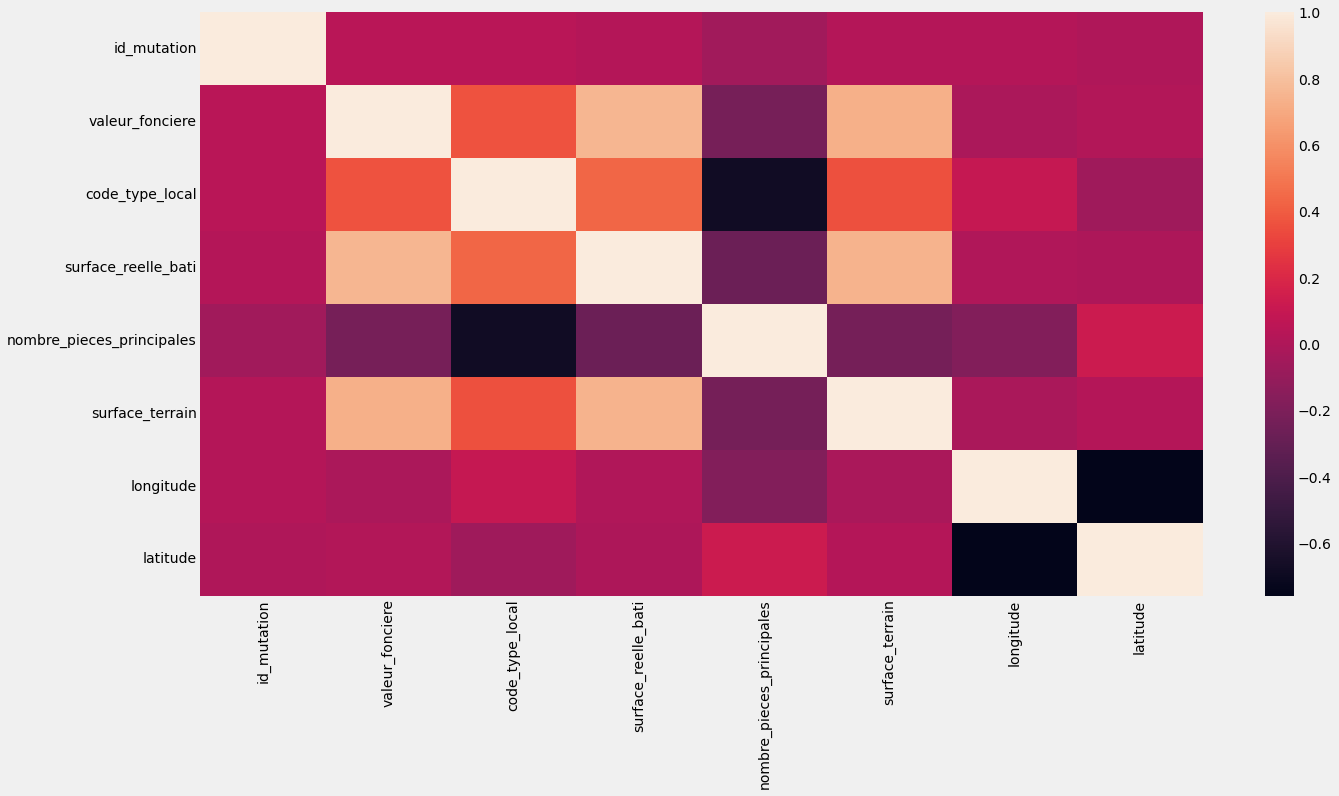

In [22]:
cormat = df_cleaned.corr()
sns.heatmap(cormat)

 ## Réduction des données 

#### Puisqu'on s'interesse à l'estimation d'une maison ou d'un appartement, pour cela on va garder que les code_type_local de la valeur {1.0, 2.0

In [23]:
df_cleaned.groupby('code_type_local')['code_type_local'].agg('count')

code_type_local
1.0    1061
2.0      80
4.0      82
Name: code_type_local, dtype: int64

In [24]:
normal_rows = df_cleaned.loc[df_cleaned["code_type_local"] == 4.0]

In [25]:
normal_rows.head()

,id_mutation,valeur_fonciere,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
6,2020.0,200000.0,4.0,68.0,0.0,105.0,1.074902,49.403036
13,2018.0,820000.0,4.0,797.0,0.0,2847.0,1.067422,49.403732
23,2017.0,700000.0,4.0,797.0,0.0,2847.0,1.067422,49.403732
67,2020.0,200000.0,4.0,497.0,0.0,491.0,1.074476,49.398327
76,2020.0,280000.0,4.0,125.0,0.0,594.0,1.075473,49.402864


In [26]:
# la suppression des données avec code_type_local=4 
df_cleaned = df_cleaned.drop(normal_rows.index)

In [27]:
df_cleaned.shape

(612, 8)

In [28]:
#vérification
df_cleaned.groupby('code_type_local')['code_type_local'].agg('count')

code_type_local
1.0    573
2.0     39
Name: code_type_local, dtype: int64

In [29]:
df_cleaned.to_excel('./data_cleaned.xlsx', index=False)

## Eliminer les outliers 


In [30]:
#mean = df_cleaned["valeur_fonciere"].mean()
#threshold = mean * 5
#abnormal_rows = df_cleaned.loc[df_clean_3["valeur_fonciere"] > threshold]

In [31]:
#abnormal_rows.head()

In [32]:
#abnormal_rows.shape

In [33]:
#df_cleaned_2 = df_cleaned.drop(abnormal_rows.index)

In [34]:
#df_cleaned_2.shape

# Division des données 

In [35]:
# y pour le valeur à prédire et X les données d'apprentissage 
y = df_cleaned['valeur_fonciere'] #la valeur à prédire
X = df_cleaned[['id_mutation', 'code_type_local', 'nombre_pieces_principales'
                 ,'surface_terrain', 'surface_reelle_bati']]

In [36]:
print(y.shape) 
print(X.shape)

(612,)
(612, 5)


In [37]:
X.head()

,id_mutation,code_type_local,nombre_pieces_principales,surface_terrain,surface_reelle_bati
16,2018.0,2.0,1.0,767.0,30.0
21,2018.0,1.0,4.0,450.0,64.0
26,2021.0,1.0,4.0,475.0,80.0
33,2021.0,1.0,2.0,312.0,57.0
38,2021.0,1.0,4.0,346.0,78.0


# Entrainer le modèle de regression linéaire

In [38]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size =0.3, random_state=7)

In [40]:
model_glob = LinearRegression()
model_glob.fit(X_train, y_train)
y_predict = model_glob.predict(X_test)

# Evaluation du modèle

In [41]:
# importation du module r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# prediction
score=r2_score(y_test,y_predict)
score

-0.7632677452407235

#### 76.32 %  en taux de prédiction  

# Coefficients du modèle et interception de la régression linéaire

In [44]:
#a fournir au developpeur : les coefficients du modèle 
model_glob.coef_


array([1.12891240e+04, 2.45339972e+05, 3.04452539e+03, 1.03940627e+02,
       9.37766798e+02])

In [45]:
#A fournir eu developpeur : le biais 
model_glob.intercept_

-23005984.361160718